In [ ]:
from collections import defaultdict ###Import stuff and make dictionaries
import seaborn as sns
import matplotlib.pyplot as plt

f = open("C:/Users/jbro0/OneDrive/Desktop/College_Stuff/PoCSVerse/Project/Github Stuff/Pocs_Film_Project/Data/movies-vs-tropes.csv")
tropes_dict = defaultdict(list)
for line in f:
    trope_string = line.split(";")[1] ### Find tropes associated with movie
    indiv_tropes = trope_string.split(",") ### Seperate into individual tropes
    movie = line.split(";")[0]
    for trope in indiv_tropes:
        tropes_dict[trope].append(movie)
f.close()

for trope in list(tropes_dict.keys()): ### Make values lists 
    movies = tropes_dict[trope]
    tropes_dict[trope] = movies


In [ ]:
### Pick a trope and find the movies with good data
current_test_trope = "BetweenMyLegs"
alien_movies = tropes_dict[current_test_trope] ### Test a trope and find associated movies, including years and IMDB IDs
years = []
imdb_ids = []
things_not_found = []
for thing in alien_movies:
    year_found = False
    with open("C:/Users/jbro0/OneDrive/Desktop/College_Stuff/PoCSVerse/Project/Github Stuff/Pocs_Film_Project/Data/tropes_imdb_year.csv", "r") as file:
        for line in file:
            title = (line.split(",")[0]).replace(" ", "")
            if title == thing:
                
                if line.split(",")[-2] == "":
                    year_found = False
                else:
                    years.append(line.split(",")[-2]) 
                    imdb_ids.append(line.split(",")[-1])
                    year_found = True
    if year_found == False:
        print(thing + " not found.")
        things_not_found.append(thing)

found_movies = alien_movies.copy() ### Collect all movies plus years that work
for thing in found_movies:
    if thing in things_not_found:
        found_movies.remove(thing)



FantasticFour2005 not found.
LaraCroftTombRaider not found.


Text(0.5, 0, 'Years')

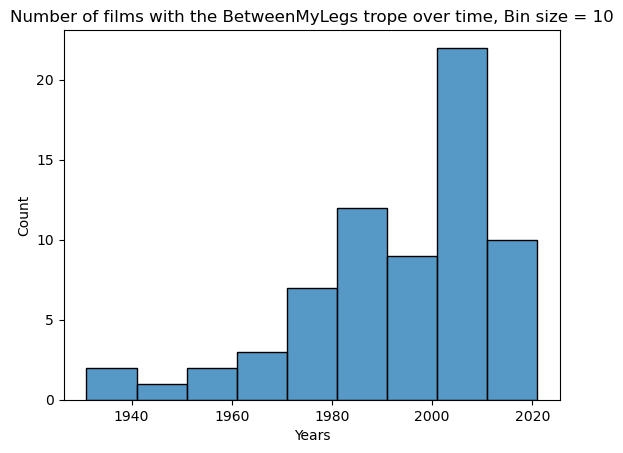

In [ ]:
#Plot
#print(len(found_movies))
#print(len(years))
binsize = 10
int_years = [float(year) for year in years]
ax = sns.histplot(data = int_years, binwidth=binsize)
ax.set_title("Number of films with the " + current_test_trope + " trope over time, Bin size = " +str(binsize))
ax.set_xlabel("Years")
            